## Ashish Real Estate Predictor

In [3]:
import pandas as pd

In [4]:
housing = pd.read_csv("data.csv")

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing["RAD"].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [7]:
housing["CHAS"].value_counts()


0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

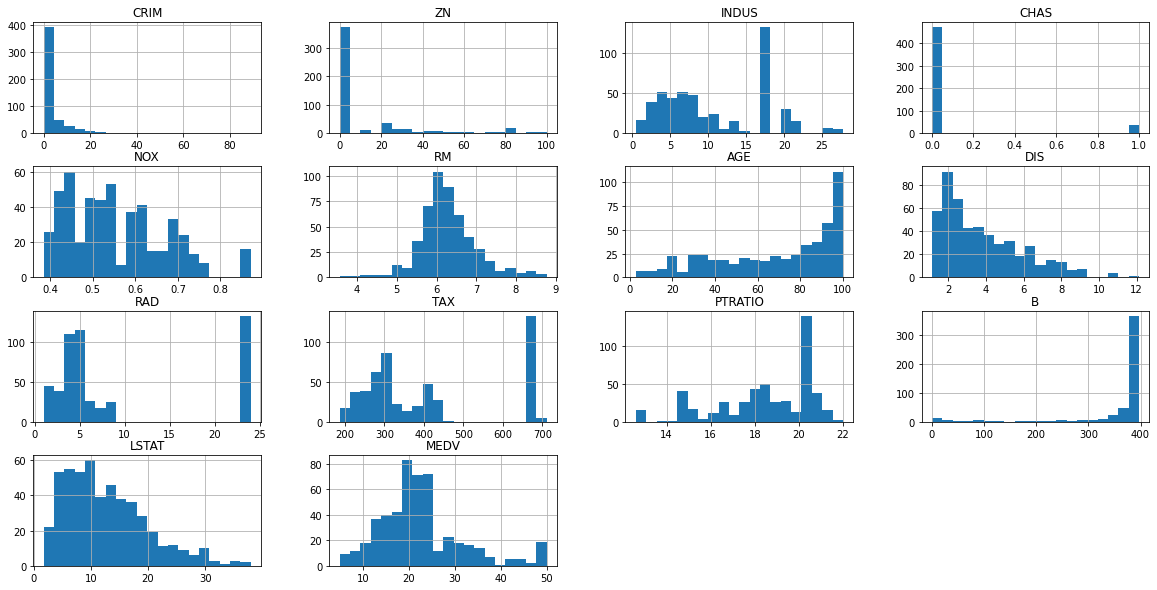

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=20,figsize=(20,10))

## Train test splitting

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,stratify=housing['CHAS'], test_size=0.2, random_state=42)

In [11]:
train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [9]:
test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [10]:
housing = train_set.copy()

## Looking for correlation

In [11]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678457
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [12]:
#housing.plot(kind='scatter',x="RM",y="MEDV",alpha=0.8)

In [13]:
#from pandas.plotting import scatter_matrix
#attributes=["MEDV","RM","ZN","LSTAT"]
#scatter_matrix(housing[attributes], figsize = (20,20))

In [14]:
housing["TAXRM"] = housing["TAX"] / housing["RM"]

In [15]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,NaN,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,NaN
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [16]:
m = train_set.drop("MEDV",axis=1)
n = train_set["MEDV"].copy()

## Missing attribute

1. Remove data points
2. Remove attributes
3. Set the value to mean or medium

In [17]:
# housing.dropna(subset=["RM"])  # This removes data points with missing value
# housing.drop("RM", Axis=1) # This removes entire RM column

In [18]:
# Set the value to mean or medium

median = housing["RM"].median()
housing["RM"].fillna(median)

254    6.211
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [19]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [20]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [21]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279552,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.612264
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711419,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.366019
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


##  Scikit-learn Design

Three types of objects in Sklearn
1. Estimators - Estimates some parameters based on data set e.g SimpleImputer. It Has fit and transform method
2. Transformers - Takes input and returns output based on learnings from fit. It has convinience funtion of fit_transform()
3. Predictors - e.g LinearRegression. fit() and predict() are two common functions.

## Feature Scaling


Min Max scaling ( Normalization ) : (value-min)/(max-min) : Sklearn has MinMaxScaler class to do this
Standardization :( Value - Mean)/Standar deviation : Sklearn has StandardScaler class to do this

## Creating pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler()),
])

In [23]:
housing_num_tr = my_pipeline.fit_transform(m)

## Selecting model

In [24]:
housing_num_tr.shape

(404, 13)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model =LinearRegression()
#model =DecisionTreeRegressor()
model =RandomForestRegressor()
model.fit(housing_num_tr,n)

RandomForestRegressor()

In [84]:
some_data = m.iloc[:5]


In [85]:
some_label = n.iloc[:5]



In [86]:
prepared_data = my_pipeline.transform(some_data)

In [87]:
model.predict(prepared_data)

array([22.681, 25.403, 16.319, 23.428, 23.674])

In [88]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating mode

In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
housing_predictions

array([22.681, 25.403, 16.319, 23.428, 23.674, 16.597, 24.512, 26.58 ,
       10.59 , 31.522, 15.652, 18.39 , 10.989, 33.904, 22.877, 13.612,
       19.293, 18.364,  7.348, 20.488, 18.748, 16.107, 18.005, 28.278,
       24.328, 24.759, 13.87 , 21.195, 14.783, 28.117, 14.61 , 17.489,
       11.646, 13.173, 20.544, 27.09 , 23.446, 47.553, 32.405, 19.842,
       22.001, 35.421, 36.259,  9.618, 20.275, 12.511, 21.533, 28.494,
       22.954,  7.816, 24.66 , 23.028, 24.068, 29.947, 14.837, 37.653,
       21.585, 25.155, 33.298, 17.509, 19.691, 19.673, 27.236, 20.857,
       14.241, 31.616, 49.647, 14.795, 26.611, 35.143, 22.6  , 35.595,
       22.918, 10.161, 20.501, 27.226, 25.391, 15.012, 16.207, 18.631,
       31.139,  8.57 , 19.53 , 18.522, 25.841, 22.915, 30.267, 24.82 ,
       29.518, 16.158, 23.204, 30.691, 27.85 , 20.2  , 21.632, 35.022,
       31.593, 19.655, 23.384, 16.872, 12.785, 46.184, 20.304, 43.531,
       17.095, 15.764, 19.989, 21.824, 27.387, 16.756, 17.435,  7.884,
      

In [90]:
n

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

In [91]:
lin_mse = mean_squared_error(n,housing_predictions)

In [92]:
lin_rmse =np.sqrt(lin_mse)

In [93]:
lin_mse

1.5122114999999983

In [94]:
lin_rmse

1.2297200901018077

## Cross Validation - Better evaluation

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,n,scoring="neg_mean_squared_error",cv=10)
rmse_score = np.sqrt(-scores)
rmse_score

array([2.84401264, 2.75548518, 4.61040938, 2.47251813, 3.59939567,
       2.4739332 , 4.37229813, 3.34664455, 3.43936054, 3.39839199])

In [96]:

rmse_score.std()

0.69639664416432

In [97]:
rmse_score.mean()

3.331244942791616

Comparing Outputs from models     
Liner model  
Std of mean square error : 1.05 Mean of mean square error : 5.03  
Decision tree model  
Std of mean square error : 0.8 Mean of mean square error : 4.48  
Random Forest Model  
Std of mean square error : 0.69 Mean of mean square error : 3.33  

## Saving the Model

In [98]:
from joblib import dump, load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the Model

In [99]:
x_test=test_set.drop("MEDV", axis=1)
y_test=test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
pred=model.predict(x_test_prepared)
lmse=mean_squared_error(y_test,pred)
lrmse=np.sqrt(lmse)


In [100]:
lmse

7.99939679411764

In [101]:
lrmse

2.8283204899936005

In [102]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        0.        , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [103]:
from joblib import dump, load
import numpy as np
model=load('Dragon.joblib')
input=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        0.        , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.681])